![Astrofisica Computacional](../../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


# W02A. Datos en Astrofísica


---
### A. Descargando datos del SDSS
Escriba una busqueda en SQL que permita encontrar en el SDSS (DS17), utilizando las tablas PhotoObj y SpecObj, los objetos localizados en la región con ascención recta entre 140.9 y 141.1, que tengan un brillo en la banda g mayor a 18.0 y con un corrimiento al rojo (SpecObj) mayor que 0.1. Realice la conexión entre las dos tablas a través de objid (PhotoObj) y bestobjid (SpecObj) y obtenga las siguientes características: 

- Object ID (PhotoObj)
- ra 
- dec
- las 5 magnitudes u,g,r,i,z 
- specobjid (SpecObj)
- z o redhsift (SepcObj)

Descargue los resultados en un archivo de formato `.csv`.

---
**Solución**

La estructura del query en SQL es

```
SELECT
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
s.specobjid, s.class, s.z as redshift

FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid

WHERE
p.ra BETWEEN 140.9 AND 141.1 
AND p.g < 18.0
AND s.z > 0.`
```


---
### B. Análisis de los Datos obtenidos

1. Escriba un código que lea el archivo de datos descargado y determine el número de objetos obtenidos. Verifique que no existen objetos de la clase espectral 'STAR' y determine cuantos objetos son 'GALAXY' y cuantos 'QSO'. Verifique que no existen datos faltantes.

2. Realice 5 gráficas mostrando el redshift (eje vertical) vs. cada una de las magnitudes en las bandas u,g,r,i,z (eje horizontal). En cada una de ellas identifique con color rojo las galaxias y con azul los quasars.

3. Identifique y presente la información de la galaxia con el redshift mas alto y del quasar con el redshift mas pequeño.

---
**Solución**

Leemos el archivo con `Pandas`. Nótese que debemos indicar que la primera línea corresponde a los nombres de las columnas.

In [1]:
import pandas as pd

df = pd.read_csv('SkyserverData.csv', header=1)
df

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
0,1237651190287302826,140.991704,56.028356,19.54775,17.40730,16.36121,15.91164,15.56711,507820197537671168,GALAXY,0.121750
1,1237651190824304810,140.991307,56.506975,19.34929,17.97266,17.13593,16.68212,16.38721,507822671438833664,GALAXY,0.125408
2,1237651537629282372,140.994985,58.818392,17.06698,16.72158,16.65561,16.66703,16.63705,9230396665483253760,QSO,0.709347
3,1237654604243599549,141.000354,2.735697,17.81355,17.61070,17.44889,17.44400,16.98261,639568084629219328,QSO,0.348141
4,1237654604780535848,141.061263,3.150228,17.96764,16.95400,16.19931,15.70359,15.40590,639561762437359616,QSO,0.128153
...,...,...,...,...,...,...,...,...,...,...,...
96,1237658203960639697,141.095238,40.090910,17.89582,16.88517,16.45952,16.30645,16.38215,1056115323649943552,QSO,2.893982
97,1237660413188178172,141.055077,7.965763,19.82516,17.77262,16.73558,16.29397,15.90962,1345551589447854080,GALAXY,0.104220
98,1237660413725114570,141.091301,8.381923,19.32043,17.96993,17.20876,16.80283,16.48343,1465960757727356928,GALAXY,0.113564
99,1237663548519022750,140.917053,64.141016,19.94607,17.95385,16.89392,16.45507,16.06972,2012126419827582976,GALAXY,0.120865


In [2]:
df['class']

0      GALAXY
1      GALAXY
2         QSO
3         QSO
4         QSO
        ...  
96        QSO
97     GALAXY
98     GALAXY
99     GALAXY
100    GALAXY
Name: class, Length: 101, dtype: object

In [3]:
df2 = df.groupby(['class'])['class'].count()
df2

class
GALAXY    88
QSO       13
Name: class, dtype: int64

---
Graficas de redshift vs. magnitudes

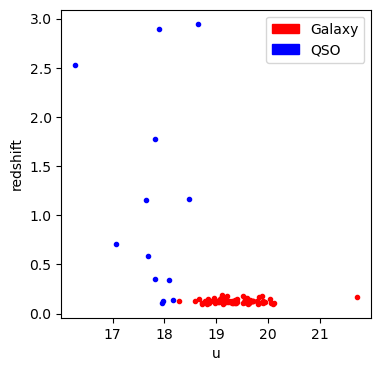

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = {'GALAXY': 'red',
          'QSO': 'blue'}

legend= [mpatches.Patch(color='red', label='Galaxy'), 
         mpatches.Patch(color='blue', label='QSO')]


plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['u'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('u')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

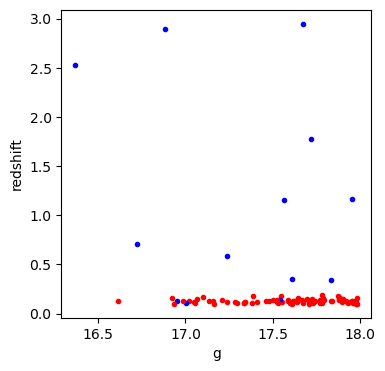

In [6]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['g'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])

plt.xlabel('g')
plt.ylabel('redshift')
plt.show()

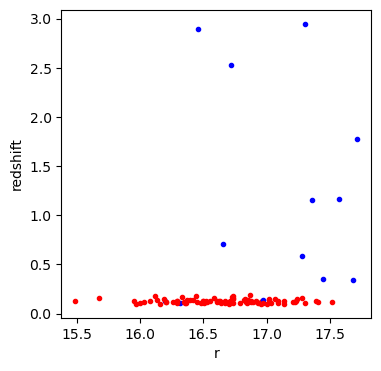

In [7]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['r'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('r')
plt.ylabel('redshift')
plt.show()

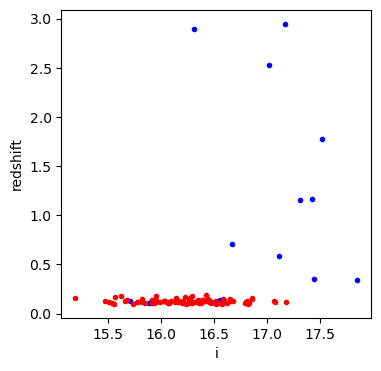

In [8]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['i'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('i')
plt.ylabel('redshift')
plt.show()

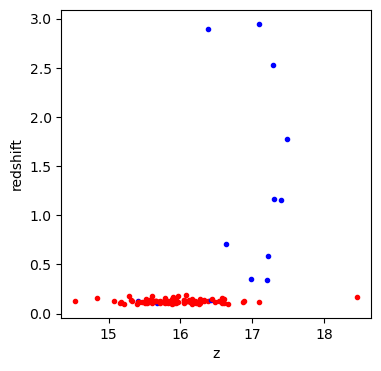

In [9]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['z'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('z')
plt.ylabel('redshift')
plt.show()

In [28]:
galaxies_df = df.groupby(['class']).get_group('GALAXY')

idx_max_redshift = galaxies_df['redshift'].idxmax()

df.iloc[idx_max_redshift]

objid        1237661065486336250
ra                    141.055727
dec                     9.371133
u                       19.11728
g                       17.78404
r                        16.8665
i                       16.41911
z                       16.07724
specobjid    1466046794512230400
class                     GALAXY
redshift                0.189329
Name: 45, dtype: object

In [29]:
QSO_df = df.groupby(['class']).get_group('QSO')

idx_min_redshift = QSO_df['redshift'].idxmin()

df.iloc[idx_min_redshift]

objid        1237660765916496041
ra                    141.087865
dec                    36.893822
u                       17.94765
g                       17.00332
r                       16.31914
i                       15.88601
z                       15.66677
specobjid    1434507582239696896
class                        QSO
redshift                  0.1065
Name: 43, dtype: object

---
### C. Índices de Color

1. Defina columnas en el dataframe con los índices de color `u-g`, `g-i`, `r-i` e `i-z` para cada uno de los objetos.

2. Realice 4 gráficas mostrando el redshift (eje vertical) vs. cada uno de los índices de color, identificando con color rojo las galaxias y con azul los quasars.

3. Realice una gráfica mostrando el índice de color `r-i` (eje vertical) vs. índice de color `u-g` (eje horizontal) e indicando el valor de redshift para cada objeto con una escala de color. Puede identificar algún(os) objeto(s) ailslado(s) de la tendencia? Que interpretación daría para este comportamiento? 

---
**Solución**

Agregamos las columnas de los índices de color

In [31]:
df['u-g'] = df['u'] - df['g']
df['g-i'] = df['g'] - df['i']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']
df

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,u-g,g-i,r-i,i-z
0,1237651190287302826,140.991704,56.028356,19.54775,17.40730,16.36121,15.91164,15.56711,507820197537671168,GALAXY,0.121750,2.14045,1.49566,0.44957,0.34453
1,1237651190824304810,140.991307,56.506975,19.34929,17.97266,17.13593,16.68212,16.38721,507822671438833664,GALAXY,0.125408,1.37663,1.29054,0.45381,0.29491
2,1237651537629282372,140.994985,58.818392,17.06698,16.72158,16.65561,16.66703,16.63705,9230396665483253760,QSO,0.709347,0.34540,0.05455,-0.01142,0.02998
3,1237654604243599549,141.000354,2.735697,17.81355,17.61070,17.44889,17.44400,16.98261,639568084629219328,QSO,0.348141,0.20285,0.16670,0.00489,0.46139
4,1237654604780535848,141.061263,3.150228,17.96764,16.95400,16.19931,15.70359,15.40590,639561762437359616,QSO,0.128153,1.01364,1.25041,0.49572,0.29769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1237658203960639697,141.095238,40.090910,17.89582,16.88517,16.45952,16.30645,16.38215,1056115323649943552,QSO,2.893982,1.01065,0.57872,0.15307,-0.07570
97,1237660413188178172,141.055077,7.965763,19.82516,17.77262,16.73558,16.29397,15.90962,1345551589447854080,GALAXY,0.104220,2.05254,1.47865,0.44161,0.38435
98,1237660413725114570,141.091301,8.381923,19.32043,17.96993,17.20876,16.80283,16.48343,1465960757727356928,GALAXY,0.113564,1.35050,1.16710,0.40593,0.31940
99,1237663548519022750,140.917053,64.141016,19.94607,17.95385,16.89392,16.45507,16.06972,2012126419827582976,GALAXY,0.120865,1.99222,1.49878,0.43885,0.38535


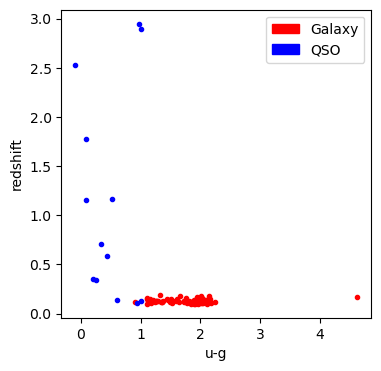

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = {'GALAXY': 'red',
          'QSO': 'blue'}

legend= [mpatches.Patch(color='red', label='Galaxy'), 
         mpatches.Patch(color='blue', label='QSO')]


plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['u-g'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('u-g')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

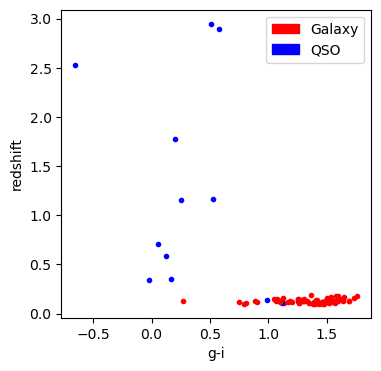

In [33]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['g-i'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('g-i')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

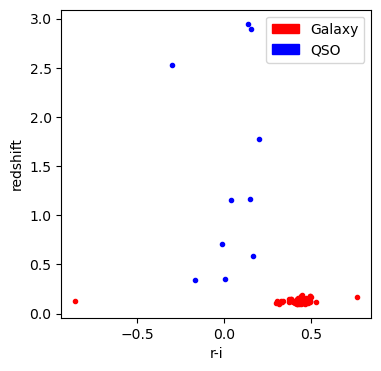

In [34]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['r-i'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('r-i')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

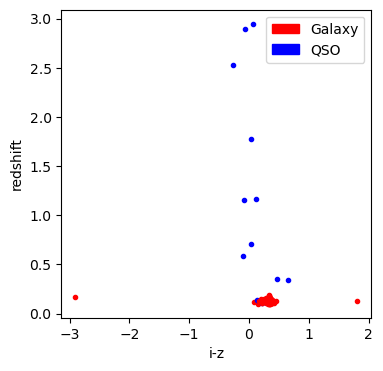

In [35]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['i-z'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('i-z')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

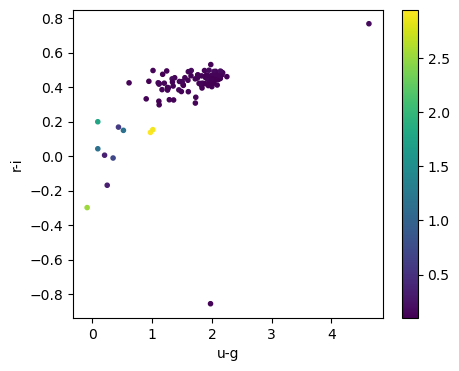

In [46]:
plt.figure(figsize=(5,4))
plt.scatter(df['u-g'],df['r-i'], marker='.', c=df['redshift'])
plt.xlabel('u-g')
plt.ylabel('r-i')
plt.colorbar()
plt.show()